**Прогноз оттока клиентов в telecom сфере**

Этот набор данных состоит из 100 переменных и 100 тысяч записей. Этот набор данных содержит различные переменные, объясняющие атрибуты телекоммуникационной отрасли и различные факторы, которые считаются важными при работе с клиентами телекоммуникационной отрасли. Целевой переменной здесь является отток, который объясняет, уйдет ли клиент или нет. Мы можем использовать этот набор данных, чтобы предсказать клиентов, которые уйдут или не уйдут, в зависимости от различных доступных переменных.

**Импортируем для начала базовые библиотеки**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Считаем файл**

In [2]:
train= pd.read_csv("Telecom_customer churn.csv")

**Посмотрим данные**

In [3]:
train.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


**Посмотрим колличество данных**

In [4]:
train.shape

(100000, 100)

**Посмотрим название колонок**

Расшифровка названия колонок есть в дополнительном .txt файле

In [5]:
train.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

**Посмотрим информацию о данных**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

Видим, что в некоторые колонки имеют достаточно больше количество пустых ячеек. Удалим их из дата сета.

In [7]:
train.drop(columns=['ownrent','lor','dwlltype','adults','infobase','income','numbcars','HHstatin','dwllsize'],inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 91 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [9]:
train.shape

(100000, 91)

Удалим те сроки, которые имеют больше 1 пустого значения. Мы можем в колонках заменить пустые ячейки, например средними значениями, но при удалении мы потеряем не очень много строк данных, за то не потеряем в достоверности и частве данных, заменяя синтетическими значениями пустые ячеийки.

In [10]:
train.dropna(axis=0,thresh=90,inplace=True)

In [11]:
train.shape

(94076, 91)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94076 entries, 0 to 99993
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          94076 non-null  float64
 1   mou_Mean          94076 non-null  float64
 2   totmrc_Mean       94076 non-null  float64
 3   da_Mean           94076 non-null  float64
 4   ovrmou_Mean       94076 non-null  float64
 5   ovrrev_Mean       94076 non-null  float64
 6   vceovr_Mean       94076 non-null  float64
 7   datovr_Mean       94076 non-null  float64
 8   roam_Mean         94076 non-null  float64
 9   change_mou        94076 non-null  float64
 10  change_rev        94076 non-null  float64
 11  drop_vce_Mean     94076 non-null  float64
 12  drop_dat_Mean     94076 non-null  float64
 13  blck_vce_Mean     94076 non-null  float64
 14  blck_dat_Mean     94076 non-null  float64
 15  unan_vce_Mean     94076 non-null  float64
 16  unan_dat_Mean     94076 non-null  float6

Посмотрим уникальные значения для тех столбцов, которые имеют пропуски в ячейках

In [13]:
train['prizm_social_one'].unique()

array(['S', 'U', 'T', 'C', nan, 'R'], dtype=object)

In [14]:
train['area'].unique()

array(['NORTHWEST/ROCKY MOUNTAIN AREA', 'CHICAGO AREA',
       'GREAT LAKES AREA', 'NEW ENGLAND AREA', 'DALLAS AREA',
       'CENTRAL/SOUTH TEXAS AREA', 'TENNESSEE AREA', 'MIDWEST AREA',
       'PHILADELPHIA AREA', 'OHIO AREA', 'HOUSTON AREA', 'SOUTHWEST AREA',
       'NEW YORK CITY AREA', 'ATLANTIC SOUTH AREA', 'SOUTH FLORIDA AREA',
       'CALIFORNIA NORTH AREA', 'DC/MARYLAND/VIRGINIA AREA',
       'NORTH FLORIDA AREA', nan, 'LOS ANGELES AREA'], dtype=object)

In [15]:
train['hnd_price'].unique()

array([149.9899902 ,          nan,  29.98999023, 129.9899902 ,
        79.98999023, 199.9899902 ,  59.98999023,  99.98999023,
         9.98999786, 299.9899902 , 399.9899902 ,  39.98999023,
       499.9899902 , 249.9899902 , 239.9899902 , 179.9899902 ,
       159.9899902 , 119.9899902 ])

In [16]:
train['hnd_webcap'].unique()

array(['WCMB', 'WC', nan, 'UNKW'], dtype=object)

Заменим пустые значения в колонках

In [17]:
train['prizm_social_one'] = train['prizm_social_one'].replace(np.nan, train['prizm_social_one'].mode()[0])
train['area'] = train['area'].replace(np.nan, train['area'].mode()[0])
train['hnd_webcap'] = train['hnd_webcap'].replace(np.nan, train['hnd_webcap'].mode()[0])
train['hnd_price'] = train['hnd_price'].replace(np.nan, train['hnd_price'].mode()[0])

In [18]:
columns=train.columns

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94076 entries, 0 to 99993
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          94076 non-null  float64
 1   mou_Mean          94076 non-null  float64
 2   totmrc_Mean       94076 non-null  float64
 3   da_Mean           94076 non-null  float64
 4   ovrmou_Mean       94076 non-null  float64
 5   ovrrev_Mean       94076 non-null  float64
 6   vceovr_Mean       94076 non-null  float64
 7   datovr_Mean       94076 non-null  float64
 8   roam_Mean         94076 non-null  float64
 9   change_mou        94076 non-null  float64
 10  change_rev        94076 non-null  float64
 11  drop_vce_Mean     94076 non-null  float64
 12  drop_dat_Mean     94076 non-null  float64
 13  blck_vce_Mean     94076 non-null  float64
 14  blck_dat_Mean     94076 non-null  float64
 15  unan_vce_Mean     94076 non-null  float64
 16  unan_dat_Mean     94076 non-null  float6

Удалим колонку 'Customer_ID'

In [20]:
train.drop(columns=['Customer_ID'],inplace=True)

Проверим коллеряцию между целевой переменной - 'churn' и остальными.

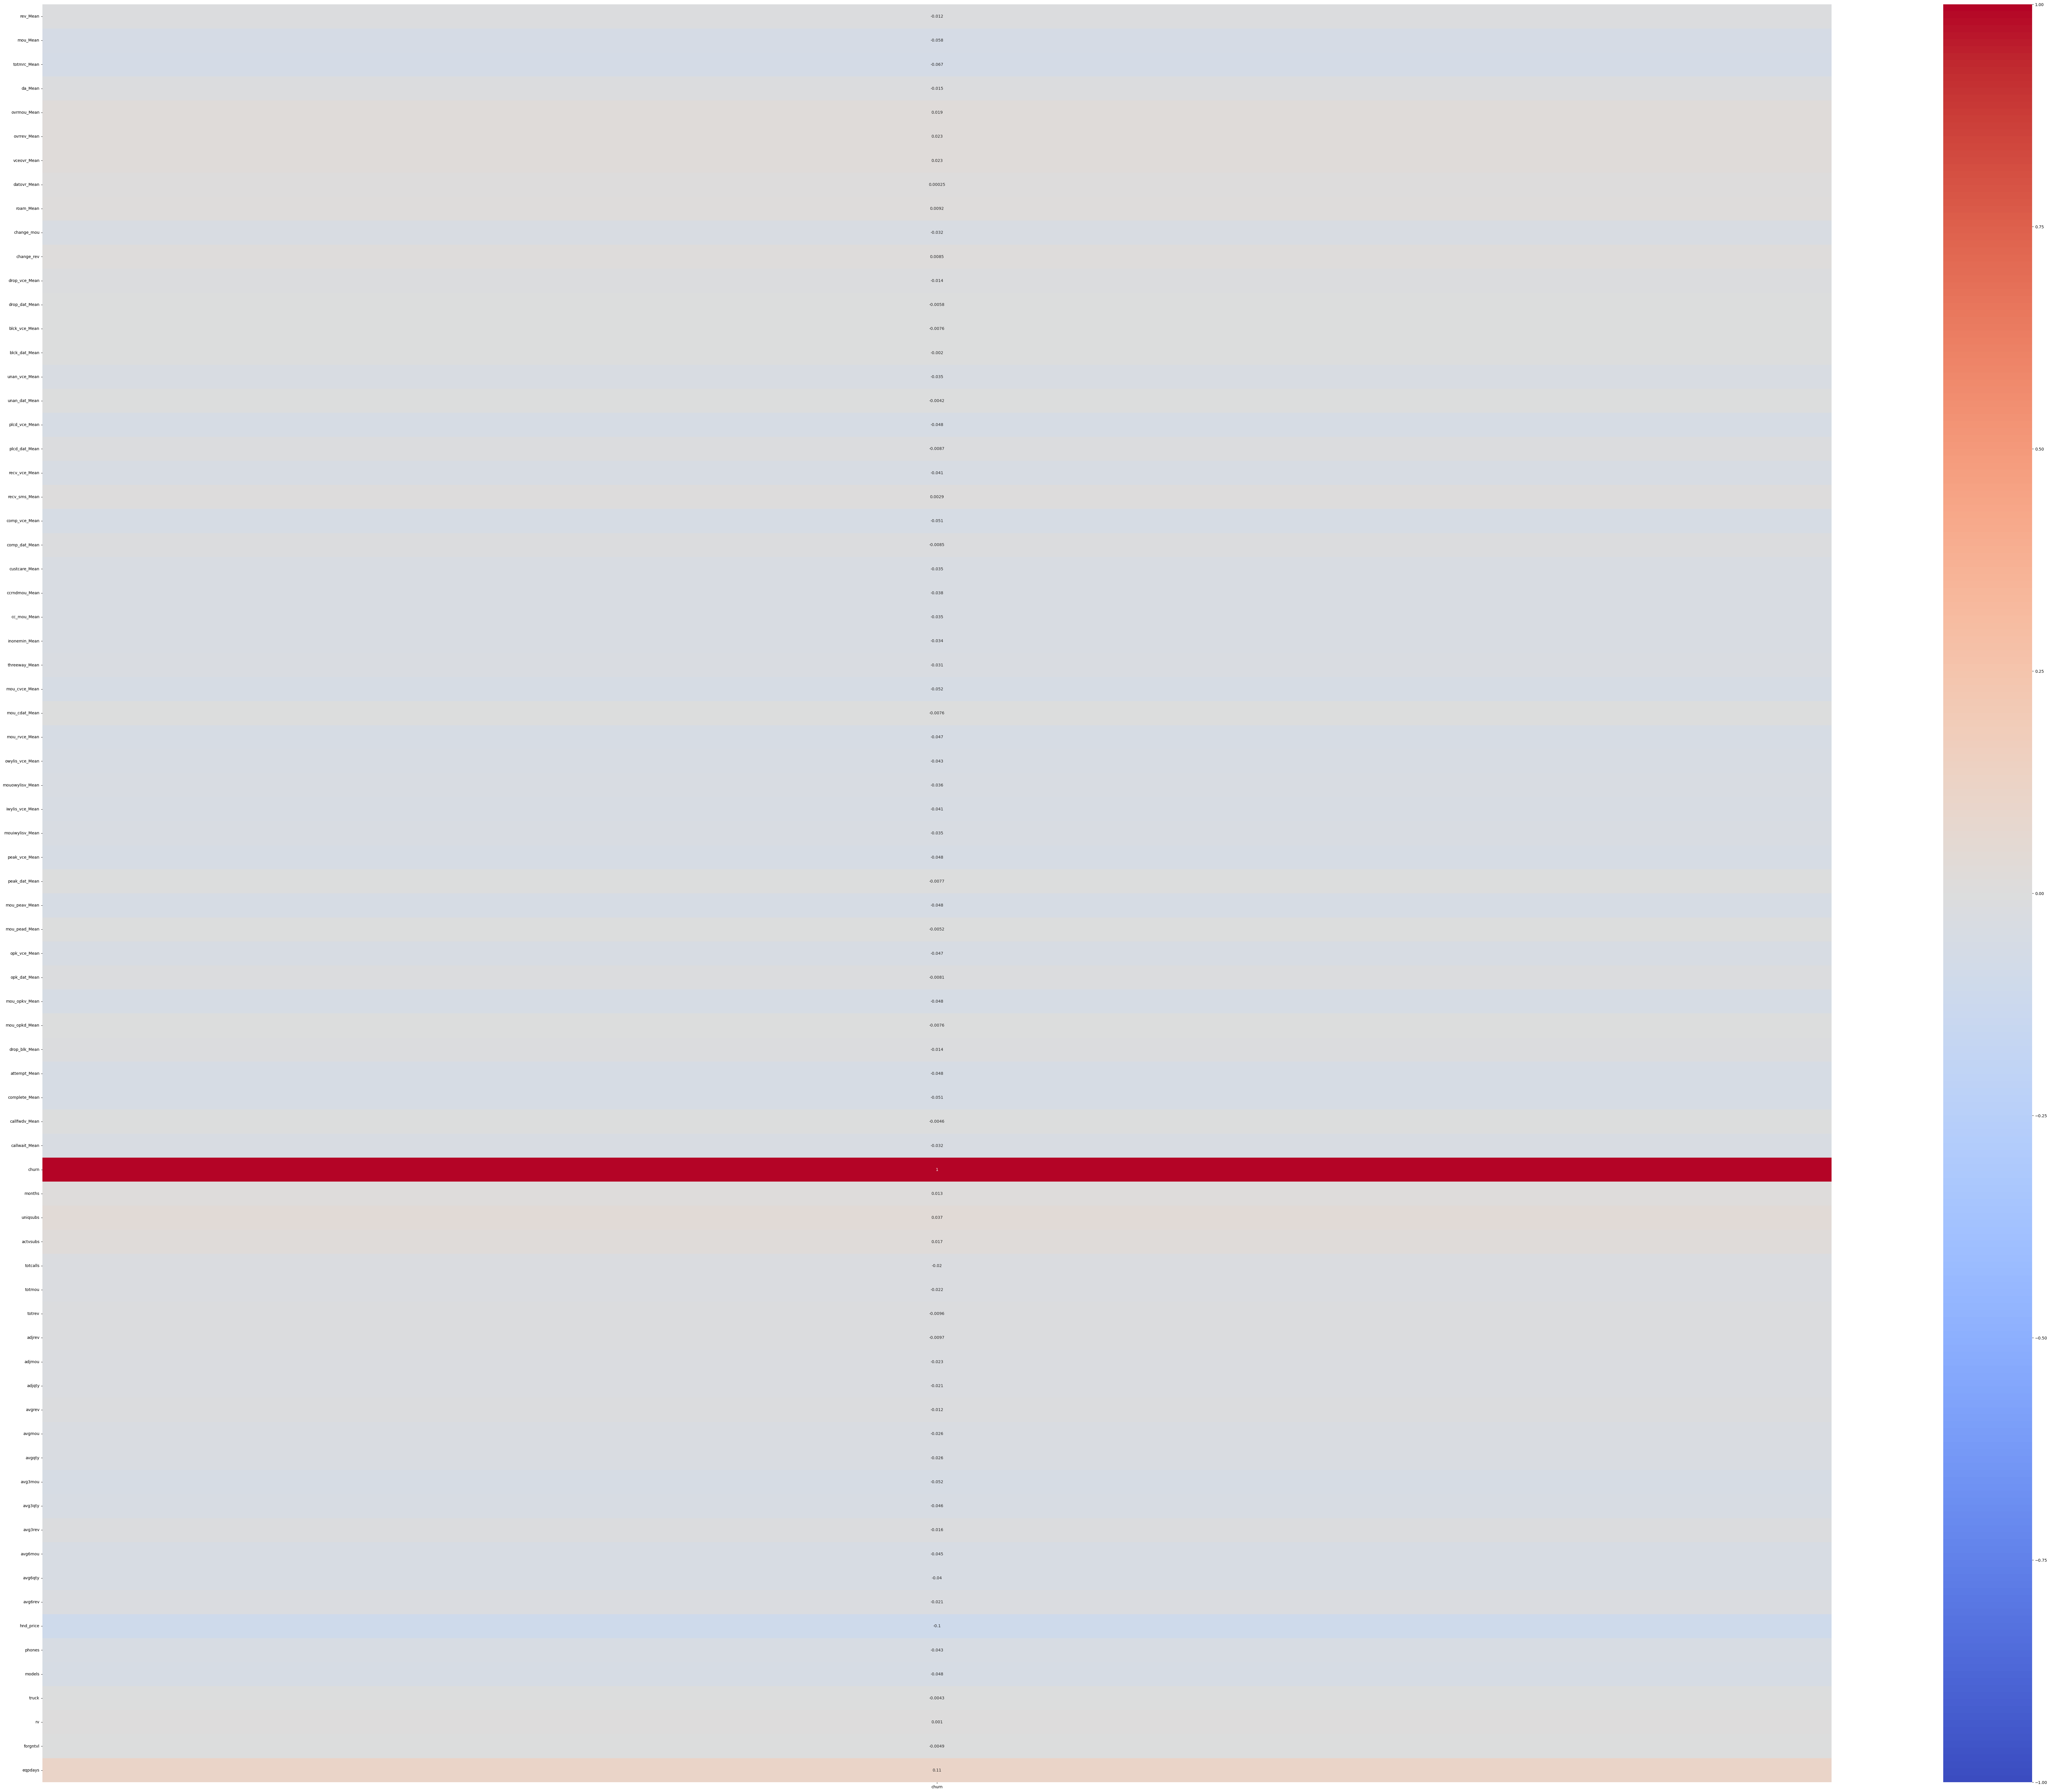

In [21]:
fig, ax= plt.subplots(figsize=(100, 80))

# Переменная для создания треугольника
mask = np.triu(np.ones_like(train.corr()))

# Корелляция колонки 'churn' с остальными колонками.  
corplot = sns.heatmap(train.corr()[['churn']], vmin = -1, vmax = +1, cmap="coolwarm", annot=True)


Данная тепловая карта кореляции имеет плохую наглядность. Посмотрим зависимость просто в числовых значениях.

In [22]:
corr = train.corr()
corr_2 = corr['churn']
data_corr = pd.DataFrame(data = corr_2)

In [23]:
corr

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
rev_Mean,1.000000,0.705780,0.601180,0.401729,0.772216,0.775214,0.770708,0.151871,0.381501,0.080061,...,0.630147,0.578164,0.857565,0.167069,0.231378,0.227856,-0.035773,-0.009721,-0.038770,-0.214172
mou_Mean,0.705780,1.000000,0.577785,0.394885,0.573850,0.537968,0.536526,0.089431,0.127126,-0.007313,...,0.946286,0.828283,0.695183,0.230855,0.299267,0.293236,-0.054108,-0.026738,-0.052384,-0.317114
totmrc_Mean,0.601180,0.577785,1.000000,0.308134,0.200498,0.163374,0.162157,0.033989,0.046203,-0.021123,...,0.583152,0.524458,0.670286,0.223279,0.228430,0.223902,-0.035578,-0.016064,-0.036544,-0.248120
da_Mean,0.401729,0.394885,0.308134,1.000000,0.304352,0.271543,0.271707,0.036321,0.044697,-0.020481,...,0.376867,0.386098,0.413925,0.090257,0.170556,0.162173,-0.032203,-0.007148,-0.021676,-0.121176
ovrmou_Mean,0.772216,0.573850,0.200498,0.304352,1.000000,0.957009,0.953992,0.163839,0.040411,-0.013120,...,0.492930,0.458703,0.650034,0.085490,0.144518,0.143142,-0.024636,-0.003346,-0.026532,-0.131147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
models,0.227856,0.293236,0.223902,0.162173,0.143142,0.120284,0.118686,0.032107,0.015334,-0.005179,...,0.301072,0.361607,0.259564,0.181414,0.890811,1.000000,0.002039,0.007019,-0.011390,-0.396154
truck,-0.035773,-0.054108,-0.035578,-0.032203,-0.024636,-0.030287,-0.029777,-0.008890,0.003765,0.006289,...,-0.059182,-0.036348,-0.043900,-0.054996,0.000891,0.002039,1.000000,0.623154,0.039666,0.045566
rv,-0.009721,-0.026738,-0.016064,-0.007148,-0.003346,-0.007099,-0.006986,-0.001911,0.003407,0.007347,...,-0.032294,-0.019298,-0.015898,-0.014062,0.002079,0.007019,0.623154,1.000000,0.046029,0.032000
forgntvl,-0.038770,-0.052384,-0.036544,-0.021676,-0.026532,-0.027679,-0.027859,-0.002023,-0.005464,0.005370,...,-0.056141,-0.056169,-0.044636,-0.019129,-0.010660,-0.011390,0.039666,0.046029,1.000000,0.046744


In [24]:
data_corr

,churn
rev_Mean,-0.012190
mou_Mean,-0.058466
totmrc_Mean,-0.066602
da_Mean,-0.014976
ovrmou_Mean,0.018512
...,...
models,-0.047881
truck,-0.004316
rv,0.001032
forgntvl,-0.004946


In [25]:
data_corr.sort_values(by=['churn'])

,churn
hnd_price,-0.101885
totmrc_Mean,-0.066602
mou_Mean,-0.058466
avg3mou,-0.051799
mou_cvce_Mean,-0.051761
...,...
ovrrev_Mean,0.022631
vceovr_Mean,0.022948
uniqsubs,0.037068
eqpdays,0.109388


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

**Создадим список колонок с типом данных объект, которые необходимо будет преобразовать.**

In [27]:
obj_list=[]
for i in train.columns:
    if train[i].dtype=='object':
        obj_list.append(i)
obj_list

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [28]:
for i in obj_list:
    print(i, train[i].unique())

new_cell ['U' 'N' 'Y']
crclscod ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'J' 'E4' 'W' 'DA' 'Y'
 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'ZY' 'E2' 'A3' 'V1' 'CY' 'EC'
 'Z2' 'P1' 'IF' 'ZF' 'EF' 'L']
asl_flag ['N' 'Y']
prizm_social_one ['S' 'U' 'T' 'C' 'R']
area ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
dualband ['Y' 'N' 'T' 'U']
refurb_new ['N' 'R']
hnd_webcap ['WCMB' 'WC' 'UNKW']
marital ['S' 'M' 'A' 'U' 'B']
ethnic ['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' 'R' 'B' 'P' 'X' 'C']
kid0_2 ['U' 'Y']
kid3_5 ['U' 'Y']
kid6_10 ['U' 'Y']
kid11_15 ['U' 'Y']
kid16_17 [

Преобразуем категориальные переменные

In [29]:
new_cell = pd.get_dummies(train['new_cell'],prefix='new_cell',drop_first=True)
crclscod = pd.get_dummies(train['crclscod'],prefix='crclscod',drop_first=True)
asl_flag = pd.get_dummies(train['asl_flag'],prefix='asl_flag',drop_first=True)
prizm_social_one = pd.get_dummies(train['prizm_social_one'],prefix='prizm_social_one',drop_first=True)
area = pd.get_dummies(train['area'],prefix='area',drop_first=True)
dualband = pd.get_dummies(train['dualband'],prefix='dualband',drop_first=True)
refurb_new = pd.get_dummies(train['refurb_new'],prefix='refurb_new',drop_first=True)
hnd_webcap = pd.get_dummies(train['hnd_webcap'],prefix='hnd_webcap',drop_first=True)
marital = pd.get_dummies(train['marital'],prefix='marital',drop_first=True)
ethnic = pd.get_dummies(train['ethnic'],prefix='ethnic',drop_first=True)
kid0_2 = pd.get_dummies(train['kid0_2'],prefix='kid0_2',drop_first=True)
kid3_5 = pd.get_dummies(train['kid3_5'],prefix='kid3_5',drop_first=True)
kid6_10 = pd.get_dummies(train['kid6_10'],prefix='kid6_10',drop_first=True)
kid11_15 = pd.get_dummies(train['kid11_15'],prefix='kid11_15',drop_first=True)
kid16_17 = pd.get_dummies(train['kid16_17'],prefix='kid16_17',drop_first=True)
creditcd = pd.get_dummies(train['creditcd'],prefix='creditcd',drop_first=True)

Добавим преобразованные колонки к дата сету

In [30]:
train=pd.concat([train,new_cell,crclscod,asl_flag,prizm_social_one,area,
                dualband,refurb_new,hnd_webcap,marital,ethnic,kid0_2,
                kid3_5,kid6_10,kid11_15,kid16_17,creditcd],axis=1)

Удалим колонки, которые преобразовали и заново добавили

In [31]:
train.drop(['new_cell','crclscod','asl_flag','prizm_social_one','area',
                'dualband','refurb_new','hnd_webcap','marital','ethnic','kid0_2',
                'kid3_5','kid6_10','kid11_15','kid16_17','creditcd'],axis=1,inplace=True)

In [32]:
train

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
0,23.997500,219.250000,22.500,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.250000,...,0,0,0,0,0,0,0,0,0,1
1,57.492500,482.750000,37.425,0.2475,22.750000,9.100000,9.100000,0.00,0.00,532.250000,...,0,0,0,1,0,0,0,0,0,1
2,16.990000,10.250000,16.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.250000,...,0,0,0,0,0,1,0,0,0,1
3,38.000000,7.500000,38.000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.500000,...,0,1,0,0,1,0,0,0,0,1
4,55.230000,570.500000,71.980,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.500000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,31.923333,63.333333,16.990,0.0000,42.666667,14.933333,14.933333,0.00,0.00,-38.333333,...,0,0,0,0,0,0,0,0,0,1
99981,34.990000,6.333333,44.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-6.333333,...,0,0,0,0,0,0,1,0,0,1
99984,85.150000,815.000000,87.990,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.000000,...,0,0,0,0,0,0,0,0,0,1
99986,117.490000,384.000000,29.990,0.0000,250.000000,87.500000,87.500000,0.00,0.00,0.000000,...,1,0,0,0,0,0,0,0,0,1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94076 entries, 0 to 99993
Columns: 183 entries, rev_Mean to creditcd_Y
dtypes: float64(65), int64(9), uint8(109)
memory usage: 63.6 MB


**Использование 0,05, т.е. 5%, в качестве минимальной корреляции для сохранения атрибута**

In [34]:
columns_corr = list()
for i in train.columns:
    if(train[i].dtype!='O' and i!='churn'):
        correlation = train['churn'].corr(train[i])
        if(correlation>0.05 or correlation < -0.05):
            columns_corr.append(i)
columns_corr

['mou_Mean',
 'totmrc_Mean',
 'comp_vce_Mean',
 'mou_cvce_Mean',
 'complete_Mean',
 'avg3mou',
 'hnd_price',
 'eqpdays',
 'asl_flag_Y',
 'hnd_webcap_WC',
 'hnd_webcap_WCMB']

In [35]:
X=train[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean',
        'avg3mou','hnd_price','eqpdays', 'churn']]

In [36]:
corr=X.corr()
corr

,mou_Mean,totmrc_Mean,comp_vce_Mean,mou_cvce_Mean,complete_Mean,avg3mou,hnd_price,eqpdays,churn
mou_Mean,1.000000,0.577785,0.830283,0.861089,0.831644,0.982252,0.230855,-0.317114,-0.058466
totmrc_Mean,0.577785,1.000000,0.506174,0.491718,0.507979,0.568621,0.223279,-0.248120,-0.066602
comp_vce_Mean,0.830283,0.506174,1.000000,0.783109,0.997711,0.830084,0.191296,-0.279974,-0.051098
mou_cvce_Mean,0.861089,0.491718,0.783109,1.000000,0.782179,0.860743,0.167621,-0.241328,-0.051761
complete_Mean,0.831644,0.507979,0.997711,0.782179,1.000000,0.831244,0.194627,-0.281548,-0.051243
avg3mou,0.982252,0.568621,0.830084,0.860743,0.831244,1.000000,0.227063,-0.310762,-0.051799
hnd_price,0.230855,0.223279,0.191296,0.167621,0.194627,0.227063,1.000000,-0.476015,-0.101885
eqpdays,-0.317114,-0.248120,-0.279974,-0.241328,-0.281548,-0.310762,-0.476015,1.000000,0.109388
churn,-0.058466,-0.066602,-0.051098,-0.051761,-0.051243,-0.051799,-0.101885,0.109388,1.000000


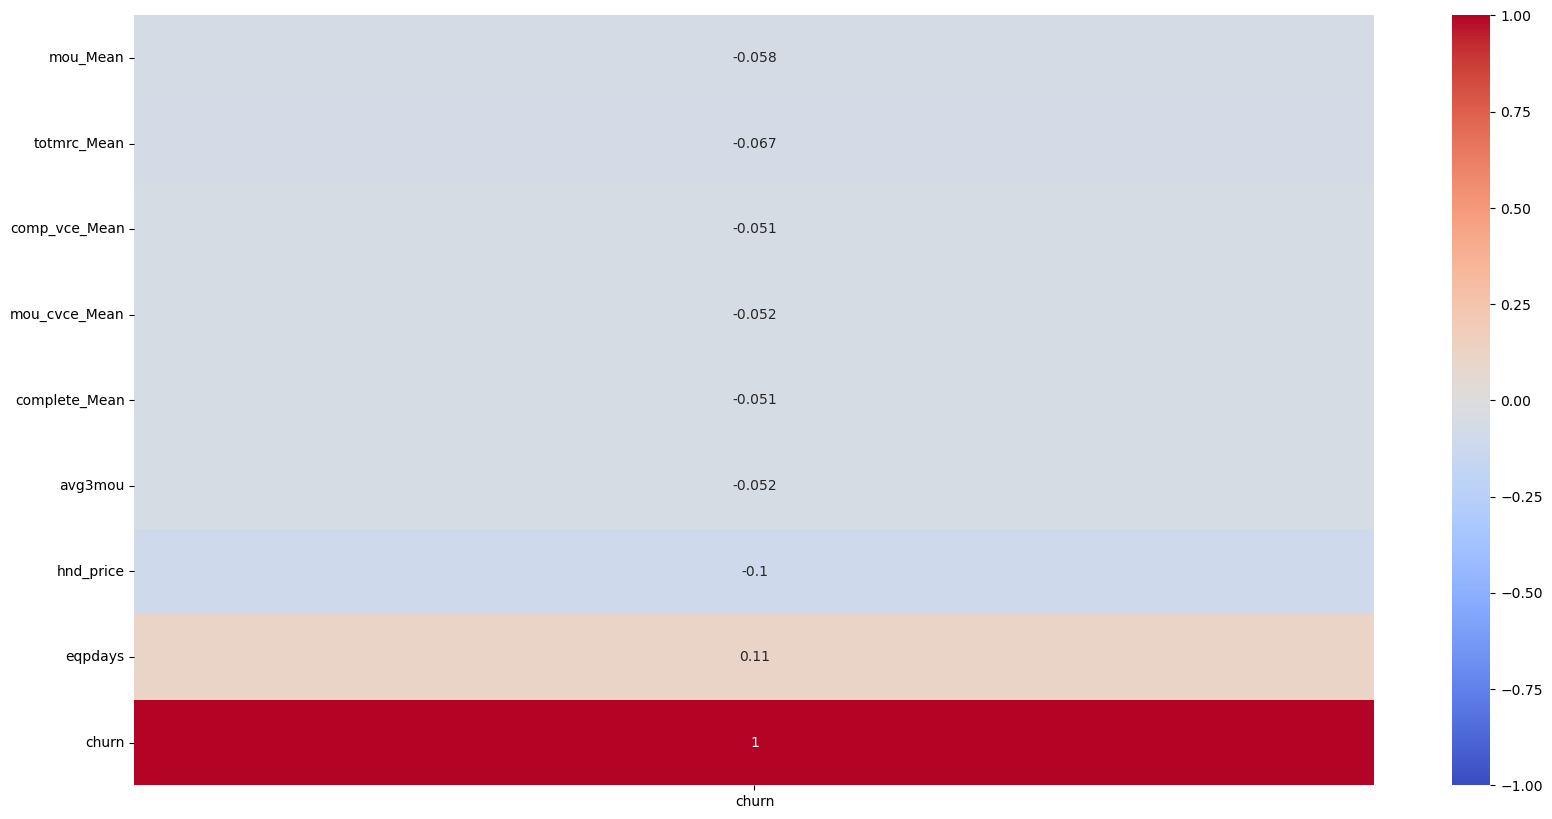

In [37]:
fig, ax= plt.subplots(figsize=(20, 10))

# Переменная для создания треугольника
mask = np.triu(np.ones_like(train.corr()))

# Корелляция колонки 'churn' с остальными колонками.  
corplot = sns.heatmap(X.corr()[['churn']], vmin = -1, vmax = +1, cmap="coolwarm", annot=True)

**Проверим дисбаланс классов**

In [38]:
train_value = X.groupby('churn', as_index=False)\
    .aggregate({'churn': 'count'})

In [39]:
train_value

,churn
0,47426
1,46650


Дисбаланс совсем небольшой. Не будем его учитывать.

Создаем df только с колонками, которые имеют достаточный коэффициент корреляции.

In [40]:
X=train[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean',
        'avg3mou','hnd_price','eqpdays']]
y=train['churn'].astype('float')

In [41]:
X

,mou_Mean,totmrc_Mean,comp_vce_Mean,mou_cvce_Mean,complete_Mean,avg3mou,hnd_price,eqpdays
0,219.250000,22.500,45.000000,90.643333,45.000000,272,149.98999,361.0
1,482.750000,37.425,193.333333,189.396667,193.333333,305,149.98999,240.0
2,10.250000,16.990,6.000000,5.426667,6.000000,12,29.98999,1504.0
3,7.500000,38.000,3.666667,8.410000,3.666667,8,29.98999,1812.0
4,570.500000,71.980,137.000000,285.233333,137.000000,558,149.98999,434.0
...,...,...,...,...,...,...,...,...
99976,63.333333,16.990,21.333333,24.366667,21.333333,84,29.98999,883.0
99981,6.333333,44.990,11.666667,21.906667,11.666667,116,99.98999,118.0
99984,815.000000,87.990,59.666667,328.370000,60.000000,482,199.98999,230.0
99986,384.000000,29.990,138.000000,81.763333,138.000000,128,59.98999,489.0


In [42]:
y

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
99976    0.0
99981    1.0
99984    1.0
99986    1.0
99993    0.0
Name: churn, Length: 94076, dtype: float64

Проверяем колонки на наличие пустых значений

In [43]:
for i in X.columns:
    print(i,' ',X[i].isna().sum())

mou_Mean   0
totmrc_Mean   0
comp_vce_Mean   0
mou_cvce_Mean   0
complete_Mean   0
avg3mou   0
hnd_price   0
eqpdays   0


Смотрим корреляцию между оставшимися параметрами

In [44]:
corr=X.corr()
corr

,mou_Mean,totmrc_Mean,comp_vce_Mean,mou_cvce_Mean,complete_Mean,avg3mou,hnd_price,eqpdays
mou_Mean,1.000000,0.577785,0.830283,0.861089,0.831644,0.982252,0.230855,-0.317114
totmrc_Mean,0.577785,1.000000,0.506174,0.491718,0.507979,0.568621,0.223279,-0.248120
comp_vce_Mean,0.830283,0.506174,1.000000,0.783109,0.997711,0.830084,0.191296,-0.279974
mou_cvce_Mean,0.861089,0.491718,0.783109,1.000000,0.782179,0.860743,0.167621,-0.241328
complete_Mean,0.831644,0.507979,0.997711,0.782179,1.000000,0.831244,0.194627,-0.281548
avg3mou,0.982252,0.568621,0.830084,0.860743,0.831244,1.000000,0.227063,-0.310762
hnd_price,0.230855,0.223279,0.191296,0.167621,0.194627,0.227063,1.000000,-0.476015
eqpdays,-0.317114,-0.248120,-0.279974,-0.241328,-0.281548,-0.310762,-0.476015,1.000000


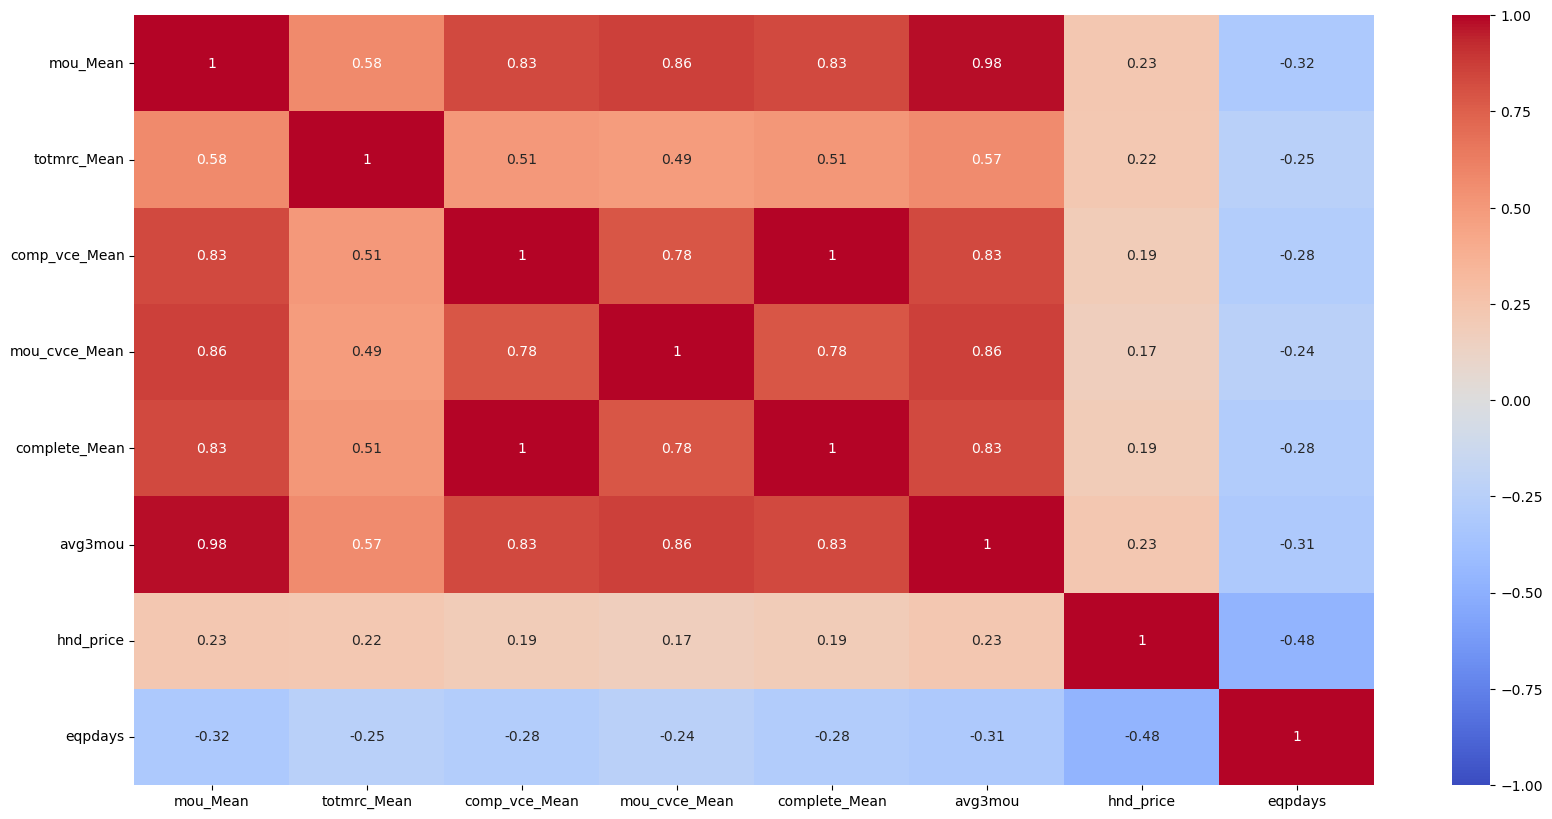

In [45]:
fig, ax= plt.subplots(figsize=(20, 10))

# Переменная для создания треугольника
mask = np.triu(np.ones_like(X.corr()))

# Квадратная тепловая карта зависимостей.
corplot = sns.heatmap(X.corr(), vmin = -1, vmax = +1, cmap="coolwarm", annot=True)

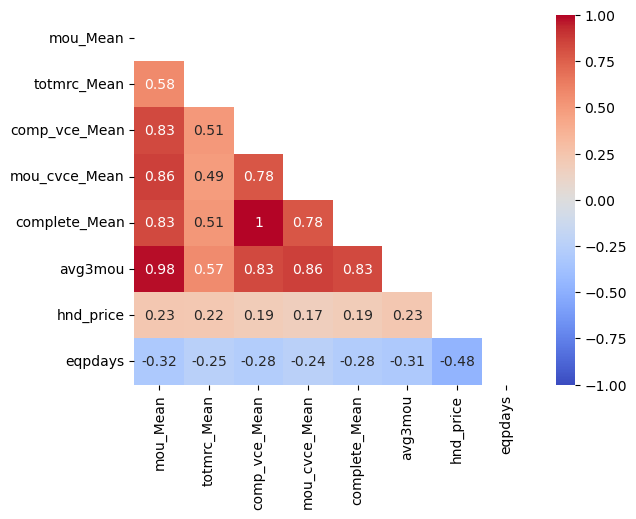

In [46]:
# Треугольная тепловая карта зависимости.
corplot = sns.heatmap(X.corr(), vmin = -1, vmax = +1, cmap="coolwarm", annot=True, mask = mask)

In [47]:
X.shape

(94076, 8)

**Создаем модель**

**Попробуем использовать метод K-ближних соседей**

Для этого метода нам необходимо дополнительно произвести нормализацию данных. 

Давайте нормируем наши признаки. Для этого в scikit-learn уже есть специальный метод MinMaxScaler.

In [48]:
from sklearn.preprocessing import MinMaxScaler

# определим экземпляр класса MinMaxScaler
mm = MinMaxScaler()

df_scalar = mm.fit_transform(X)
# так как после MinMaxScaler получаем данные типа numpy.ndarray

# то преобразуем в DataFrame
X = pd.DataFrame(data=df_scalar, columns=X.columns)

In [49]:
X

,mou_Mean,totmrc_Mean,comp_vce_Mean,mou_cvce_Mean,complete_Mean,avg3mou,hnd_price,eqpdays
0,0.017961,0.113102,0.023755,0.022732,0.023755,0.035251,0.285714,0.200219
1,0.039548,0.147263,0.102059,0.047497,0.102059,0.039528,0.285714,0.134026
2,0.000840,0.100491,0.003167,0.001361,0.003167,0.001555,0.040816,0.825492
3,0.000614,0.148579,0.001936,0.002109,0.001936,0.001037,0.040816,0.993982
4,0.046736,0.226354,0.072321,0.071531,0.072321,0.072317,0.285714,0.240153
...,...,...,...,...,...,...,...,...
94071,0.005188,0.100491,0.011262,0.006111,0.011262,0.010886,0.040816,0.485777
94072,0.000519,0.164578,0.006159,0.005494,0.006159,0.015034,0.183673,0.067287
94073,0.066766,0.262998,0.031497,0.082349,0.031673,0.062468,0.387755,0.128556
94074,0.031458,0.130246,0.072849,0.020505,0.072849,0.016589,0.102041,0.270241


In [50]:
y

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
99976    0.0
99981    1.0
99984    1.0
99986    1.0
99993    0.0
Name: churn, Length: 94076, dtype: float64

Создаем модель

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (65853, 8), y_train shape: (65853,),
X_test shape: (28223, 8), y_test shape: (28223,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidian', weights = 'uniform')

In [53]:
knn_model = knn.fit(X_train, y_train)

ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

In [55]:
knn_predictions = knn.predict(X_test)
knn_predictions

Z:\Soft\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1., 1., 0., ..., 1., 1., 1.])

Для проверки импортируем простую встроенную метрику accuracy_score, которая определяет долю правильных ответов.

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.541863019523084


Получаем не очень хороший результат

In [57]:
# Загружаем данные
train_df = pd.read_csv('/kaggle/input/titanic/train_data.csv') 
# Избавляемся от двух столбцов без нужной информации
train_df = train_df.drop(columns=['Unnamed: 0', 'PassengerId']) 
from sklearn.neighbors import KNeighborsClassifier 
predictors = ['Age', 'Fare'] 
outcome = 'Survived' 

new_record = train_df.loc[0:0, predictors] 
X = train_df.loc[1:, predictors] 
y = train_df.loc[1:, outcome] 

kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
kNN.predict(new_record)
print(kNN.predict_proba(new_record)) 

#[результат/вывод]: [[0.7 0.3]]

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train_data.csv'

In [ ]:
nbrs = knn.kneighbors(new_record)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = 'Age', y = 'Fare', style = 'Survived', 
                hue='Survived', data=train_df, alpha=0.3, ax=ax)
sns.scatterplot(x = 'Age', y = 'Fare', style = 'Survived', 
                hue = 'Survived', 
                data = pd.concat([train_df.loc[0:0, :], train_df.loc[nbrs[1][0] + 1,:]]), 
                ax = ax, legend=False)
ellipse = Ellipse(xy = new_record.values[0], 
                  width = 2 * maxDistance, height = 2 * maxDistance,
                  edgecolor = 'black', fc = 'None', lw = 1)
ax.add_patch(ellipse)
ax.set_xlim(.25, .29)
ax.set_ylim(0, .03)

plt.tight_layout()
plt.show()